In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
pi = math.pi

In [2]:
class Complex:
    def __init__(self, real, imag):
        self.re = real
        self.im = imag
        
    def __str__(self):
        if self.im == 0:
            return str(self.re)
        elif self.im < 0:
            return str(self.re)+' - '+str(-self.im)+' i'
        else:
            return str(self.re)+' + '+str(self.im)+' i'
    
    def __eq__(self, other):
        return self.re == other.re and self.im == other.im

    def __hash__(self):
        return hash((self.re, self.im))
    
    def abs(self):
        return math.hypot(self.re, self.im)
    
    def phase(self):
        return math.atan2(im, re)
        
    def plus(self, c):
        real = c.re + self.re
        imag = c.im + self.im
        return Complex(real, imag)
    
    def minus(self, c):
        real = self.re - c.re
        imag = self.im - c.im
        return Complex(real, imag)
    
    def times(self, c):
        real = self.re * c.re - self.im * c.im
        imag = self.re * c.im + self.im * c.re
        return Complex(real, imag)
    
    def scale(self, alpha):
        return Complex(self.re*alpha, self.im*alpha)
    
    def conjugate(self):
        return Complex(self.re, -self.im)
    
    def reciprocal(self):
        scale = self.re*self.re + self.im*self.im
        return Complex(self.re/scale, -self.im/scale)
    
    def real(self):
        return self.re
    
    def imag(self):
        return self.im
    
    def divides(self, c):
        return self.times(c.reciprocal())
    
    def exp(self):
        re = self.re
        im = self.im
        return Complex(math.exp(re) * math.cos(im), math.exp(re) * math.sin(im))
    
    def sin(self):
        re = self.re
        im = self.im
        return Complex(math.sin(re) * math.cosh(im), math.cos(re) * math.sinh(im))
    
    def cos(self):
        re = self.re
        im = self.im
        return Complex(math.cos(re) * math.cosh(im), -math.sin(re) * math.sinh(im))
    
    def tan(self):
        return self.sin().divides(self.cos())
    
"""
Usage:
a = Complex(5.0, 6.0)
b = Complex(-3.0, 4.0)
c = Complex(5.0, 6.0)
print a.tan()
"""

'\nUsage:\na = Complex(5.0, 6.0)\nb = Complex(-3.0, 4.0)\nc = Complex(5.0, 6.0)\nprint a.tan()\n'

In [3]:
def fft(x):        
    if x[0] is None:
        print "error"
        return None
    n = len(x)
    if n == 1:
        return [x[0]]
    if n % 2 != 0:
        print "n is not a power of 2"
        return None
    even = [None] * (n/2)
    for k in range(0, n/2):
        even[k] = x[2*k]
    q = fft(even)
    
    odd = even # reuse the array
    for k in range(0, n/2):
        odd[k] = x[2*k + 1]
    r = fft(odd)
    
    # combine even and odd
    y = [None] * n
    for k in range(0, n/2):
        kth = -2*k*pi/n
        wk = Complex(math.cos(kth), math.sin(kth))
        y[k]       = q[k].plus(wk.times(r[k]))
        y[k + n/2] = q[k].minus(wk.times(r[k]))
    return y

# compute the inverse FFT
def ifft(x):
    n = len(x)
    
    y = [None] * n
    # take conjugate
    for i in range(n):
        y[i] = x[i].conjugate()
    
    y = fft(y)
    
    # take conjugate again
    for i in range(n):
        y[i] = y[i].conjugate()
        
    for i in range(n):
        y[i] = y[i].scale(1.0 / n)
        
    return y

# compute the circular convolution of x and y
def cconvolve(x, y):
    if len(x) != len(y):
        print "error, x y length does not match"
        return None
    n = len(x)
    # compute FFT of each sequence
    a = fft(x)
    b = fft(y)
    
    # point-wise multiply
    c = [None] * n
    for i in range(n):
        c[i] = a[i].times(b[i])
    
    # compute inverse FFT
    return ifft(c)

# linear convolution of x and y
def convolve(x, y):
    zero = Complex(0, 0)
    a = [None] * (2*len(x))
    for i in range(len(x)):
        a[i] = x[i]
    for i in range(len(x), 2*len(x)):
        a[i] = zero
        
    b = [None] * (2*len(y))
    for i in range(len(y)):
        b[i] = y[i]
    for i in range(len(y), 2*len(y)):
        b[i] = zero
    
    return cconvolve(a, b)

def show(x):
    for item in x:
        print item

'''Usage'''
# p = [-0.03480425839330703, 0.07910192950176387, 0.7233322451735928, 0.1659819820667019]
# for i in range(len(p)):
#     p[i] = Complex(p[i], 0)
# q = fft(p)
# show(q)
# print '---------'
# q = ifft(q)
# show(q)
# print '---------'
# c = cconvolve(p, p)
# show(c)
# print '---------'
# d = convolve(p, p)
# show(d)

'Usage'

**Hamming Window**

In [4]:
def hammingWindow(n):
    pi = math.pi
    w = [None] * n
    for i in range(n):
        w[i] = 0.54 - 0.46*math.cos(2*pi*i/(n-1))
    return w

"""Usage"""
# w = hammingWindow(256)
# fig = plt.figure(figsize=(18, 5))
# ax = fig.add_subplot(111, facecolor='#FFFFCC')

# array_w = np.asarray(w)
# x = np.asarray(range(len(w)))
# ax.plot(x, array_w, 'o-')
# plt.show()

'Usage'

In [5]:
file_name = "dataset/p4-1_Male_20-29_170-179cm_Hand_held.txt"

In [6]:
raw_data = []
accX = []
accY = []
accZ = []
accMagn = []
fr = open(file_name, 'r')
for line in fr.readlines():
    items = line.split(';')
    x = items[1]
    y = items[2]
    z = items[3]
    magn = items[4].split()[0]
    data_tuple = [float(x), float(y), float(z), float(magn)]
    raw_data.append(data_tuple)
    accX.append(float(x))
    accY.append(float(y))
    accZ.append(float(z))
    accMagn.append(1/3.0*float(magn))
fr.close()
print file_name.split('/')[1] + " *read over", len(raw_data)

p4-1_Male_20-29_170-179cm_Hand_held.txt *read over 6326


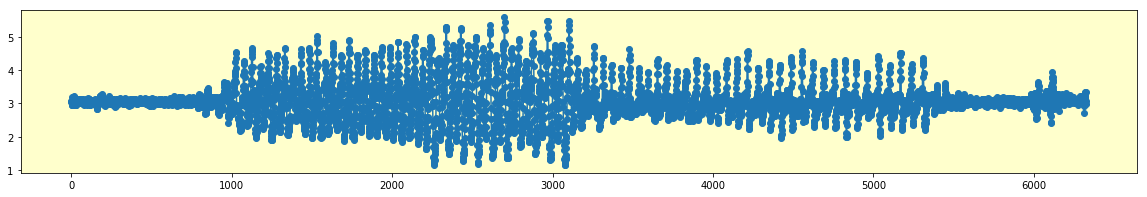

In [17]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

array_magn = np.asarray(accMagn)
x = np.asarray(range(len(array_magn)))
ax.plot(x, array_magn, 'o-')
plt.show()

**FFT signal analysis**

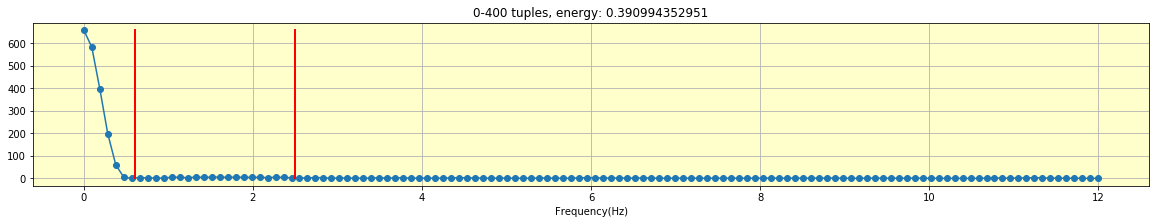

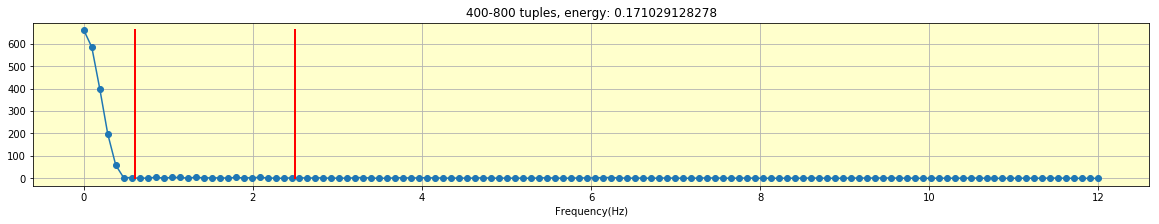

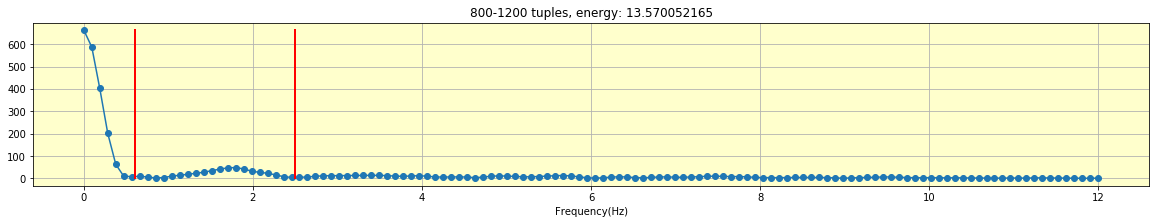

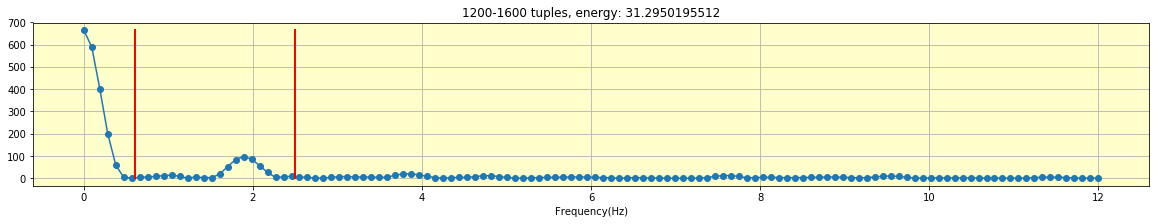

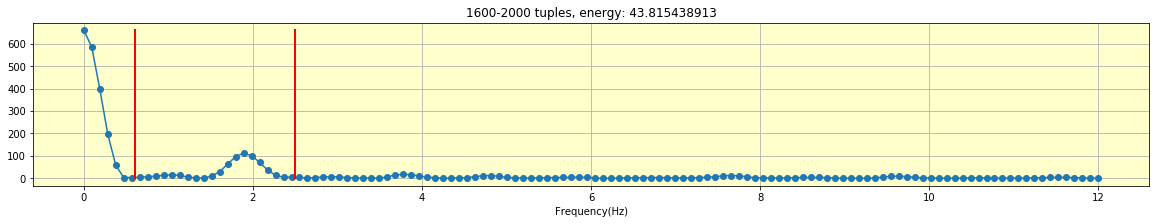

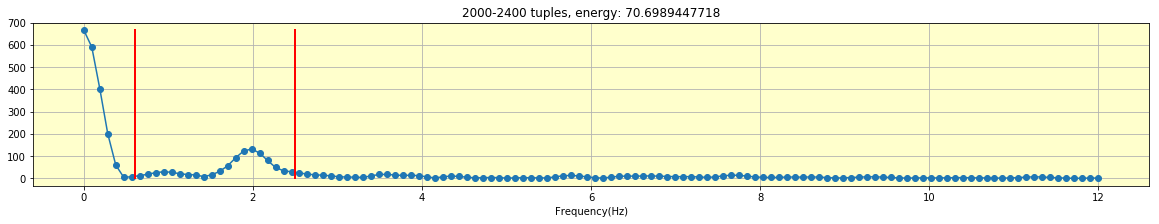

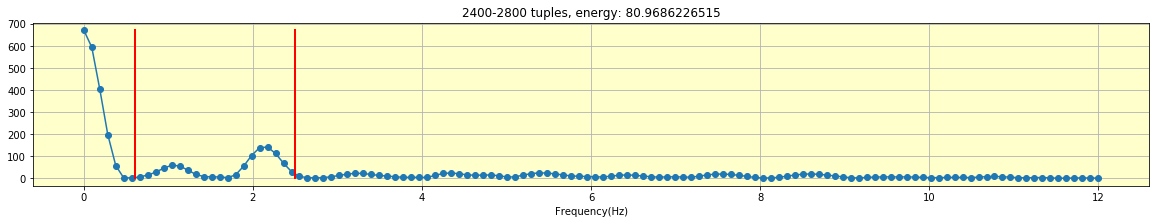

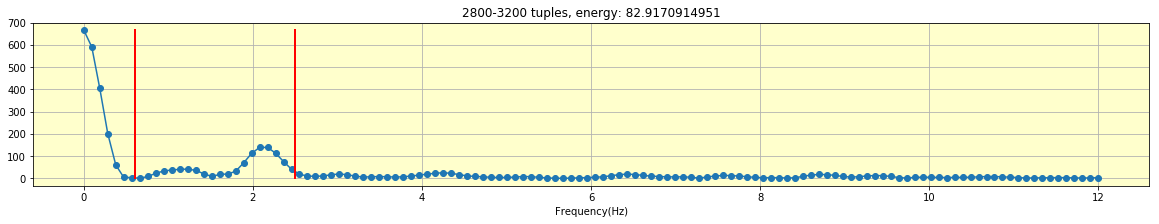

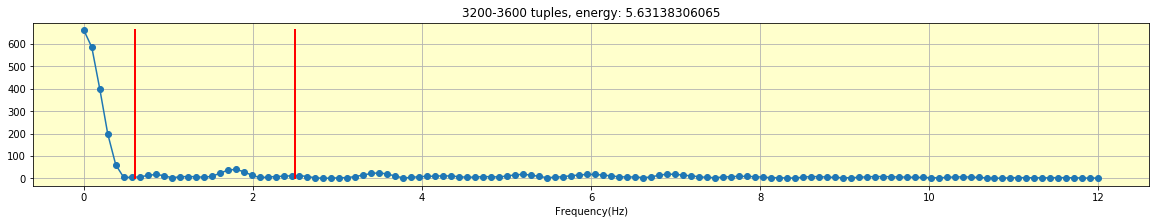

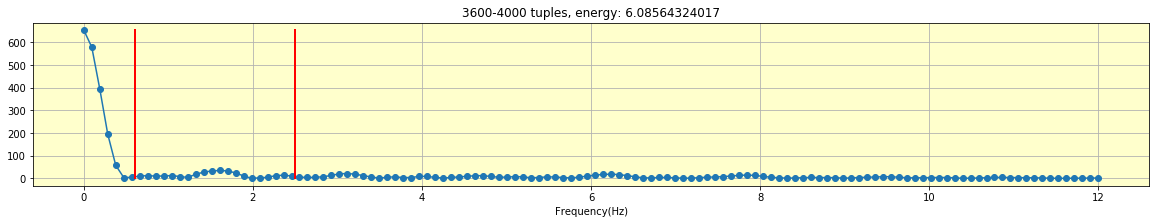

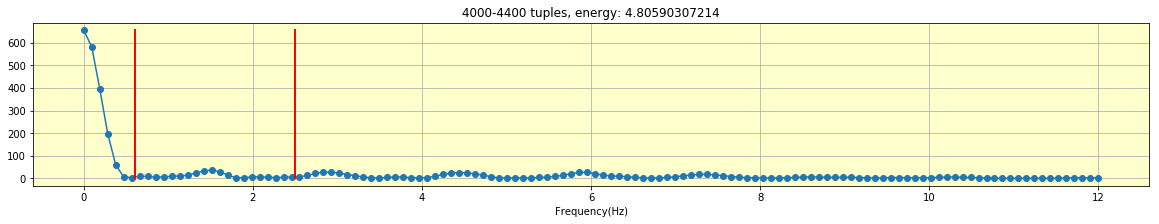

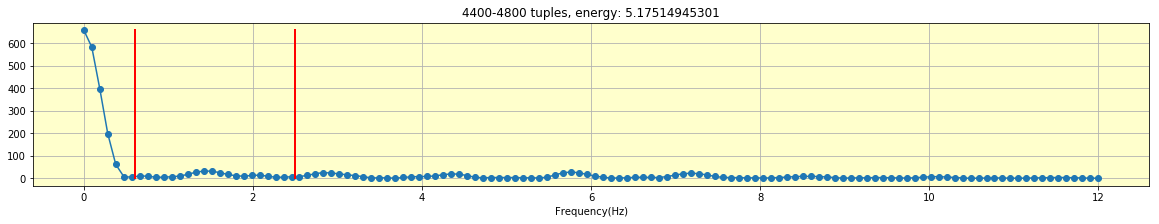

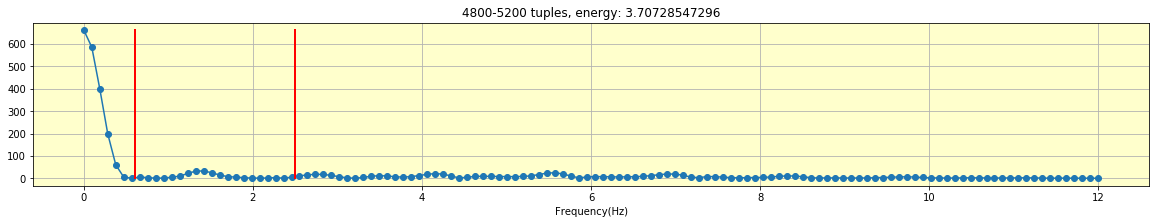

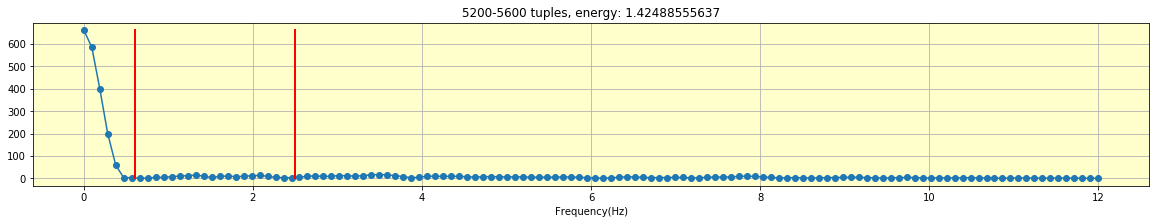

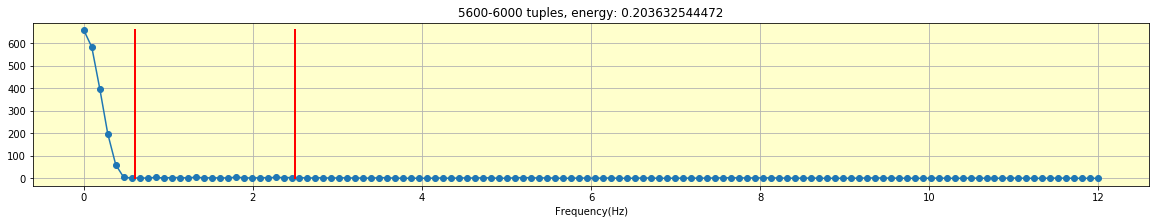

In [18]:
# n denotes the length of the DFT window, 400 tuples -> 4 second, 
# according to the ubicomp paper
fs = 100 # 100 HZ sampling
n = 400 
start = 0
low_fs = 0.6
high_fs = 2.5
while(start + n <= len(accMagn)):
    l = 1024
    w = hammingWindow(n)
    # zero padding to 1024
    # for FFT
    fft_input = [Complex(0.0, 0.0)] * l
    for i in range(n):
        val = accMagn[start+i] * w[i]
        fft_input[i] = Complex(val, 0)

    fft_res = fft(fft_input)
    fft_output = [0.0] * l
    for i in range(l):
        fft_output[i] = fft_res[i].abs()
        
    energy = 0.0
    for i in range(int(low_fs/fs*l), int(high_fs/fs*l)+1):
        energy += fft_output[i] * fft_output[i] * 1.0 / l
        
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(111, facecolor='#FFFFCC')
    y = np.asarray(fft_output[:l/8])
    x = np.linspace(0.0, fs/8, l/8)
    ax.plot(x, y, 'o-')
    text = str(start)+"-"+str((start+n))+" tuples, energy: "+str(energy)
    plt.title(text)
    plt.xlabel('Frequency(Hz)')
    # frequency from 0.6hz to 2.5hz
    plt.plot([0.6, 0.6], [0, max(y)], 'r-', lw=2)
    plt.plot([2.5, 2.5], [0, max(y)], 'r-', lw=2)
    plt.grid()
    plt.show()

    start = start + n

**Energy Analysis**

In [25]:
# n denotes the length of the DFT window, 400 tuples -> 4 second, 
# according to the ubicomp paper
fs = 100 # 100 HZ sampling
n = 400 
start = 0
sliding = 30
low_fs = 0.6
high_fs = 2.5
energy_thred = 1.0
walking = False
while(start + n <= len(accMagn)):
    l = 1024
    w = hammingWindow(n)
    # zero padding to 1024
    # for FFT
    fft_input = [Complex(0.0, 0.0)] * l
    for i in range(n):
        val = accMagn[start+i] * w[i]
        fft_input[i] = Complex(val, 0)

    fft_res = fft(fft_input)
    fft_output = [0.0] * l
    for i in range(l):
        fft_output[i] = fft_res[i].abs()
        
    energy = 0.0
    for i in range(int(low_fs/fs*l), int(high_fs/fs*l)+1):
        energy += fft_output[i] * fft_output[i] * 1.0 / l
        
    if energy > energy_thred:
        if walking == False:
            print start, "start walking"
            walking = True
    else:
        if walking == True:
            print start, "stop walking"
            walking = False
    
    start = start + sliding

660 start walking
5250 stop walking


**Different Parameter**

**This one does not work well**

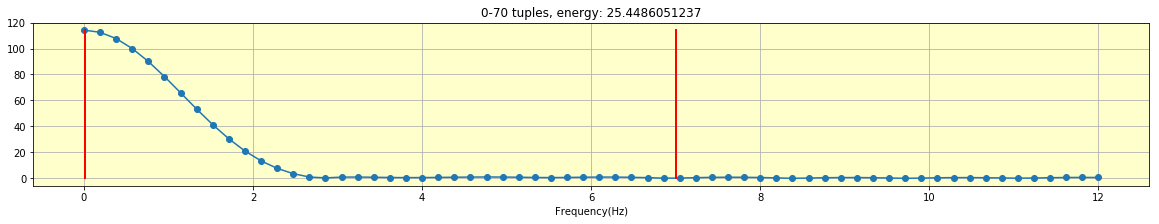

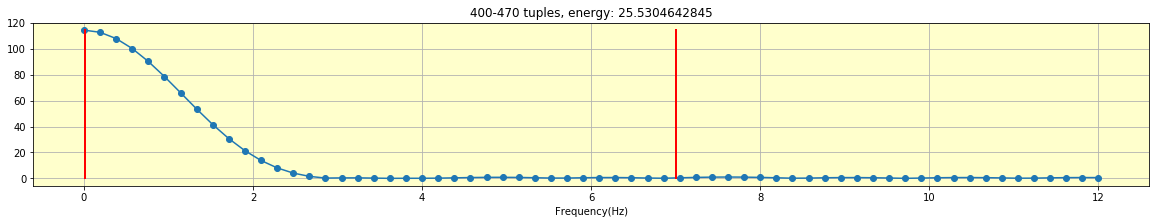

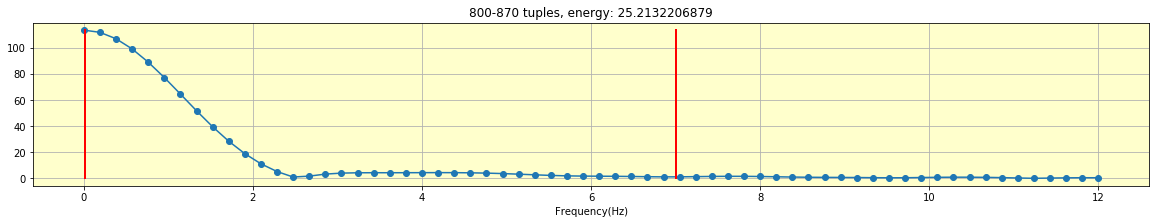

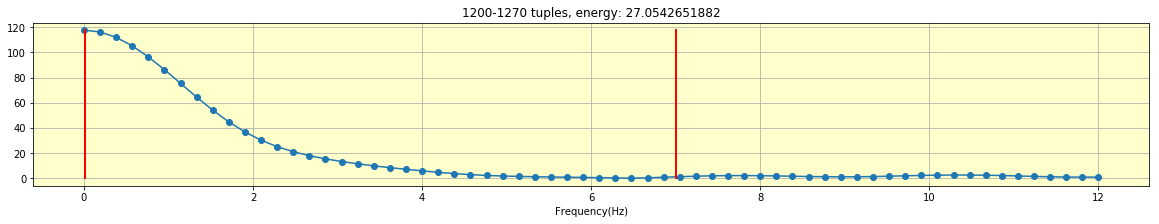

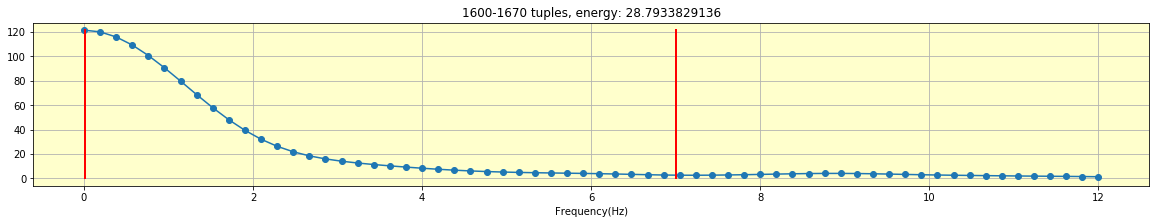

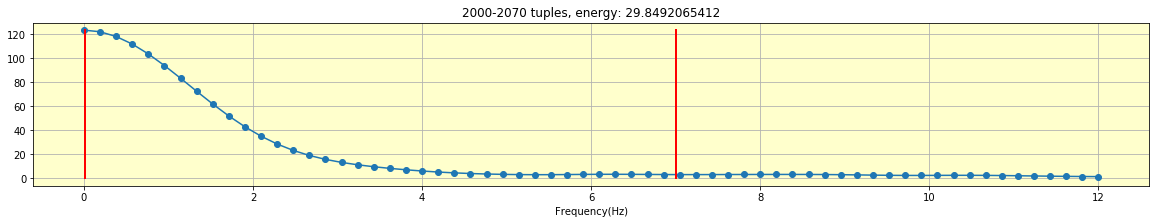

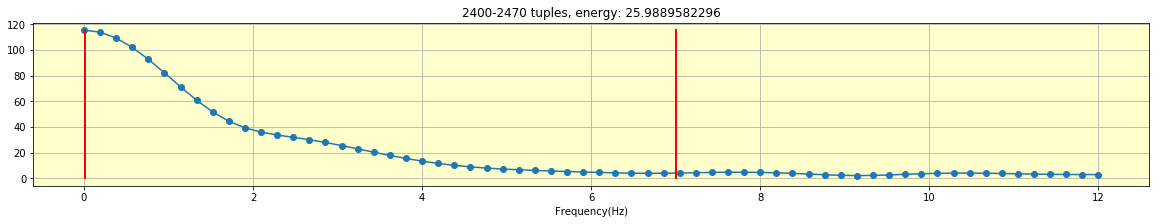

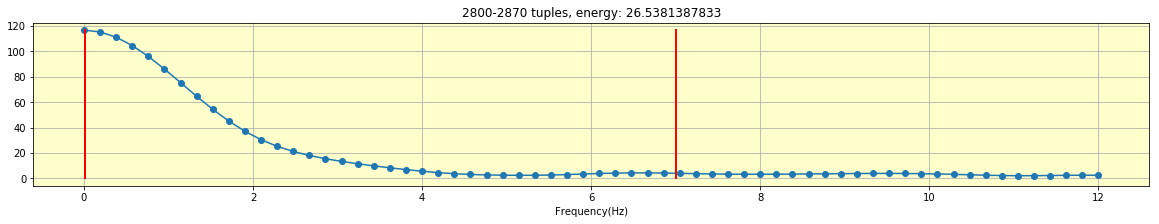

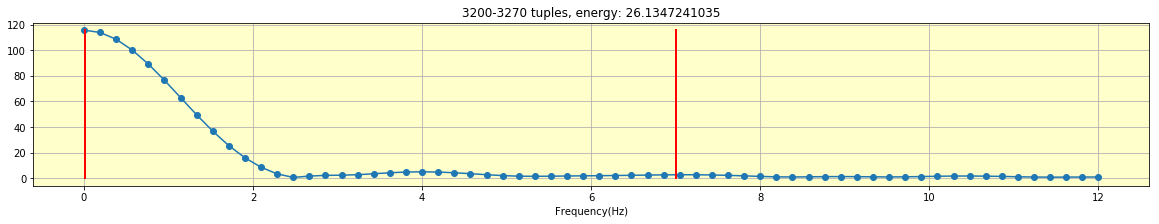

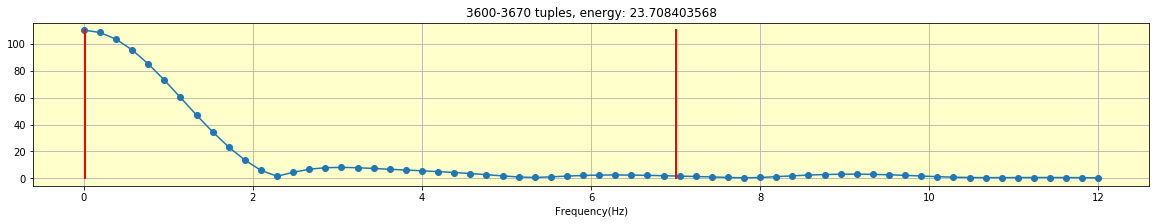

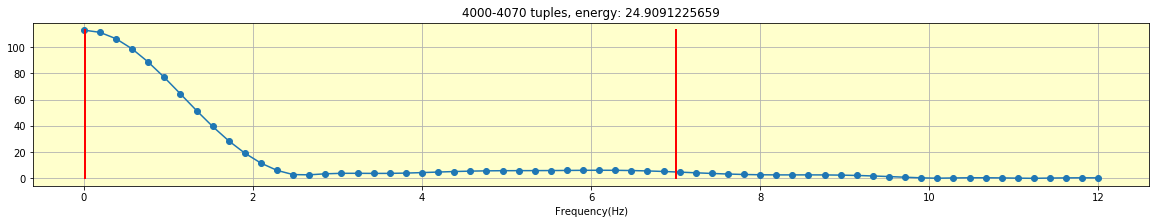

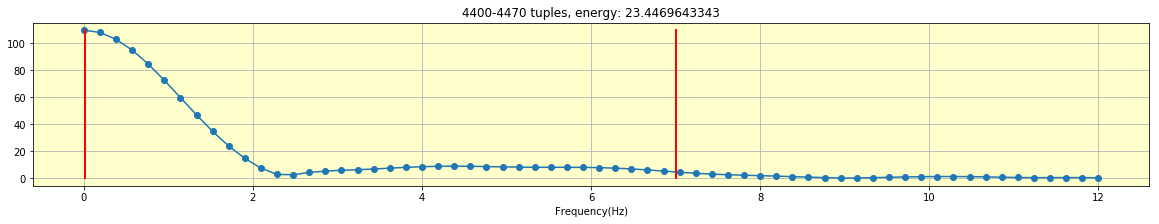

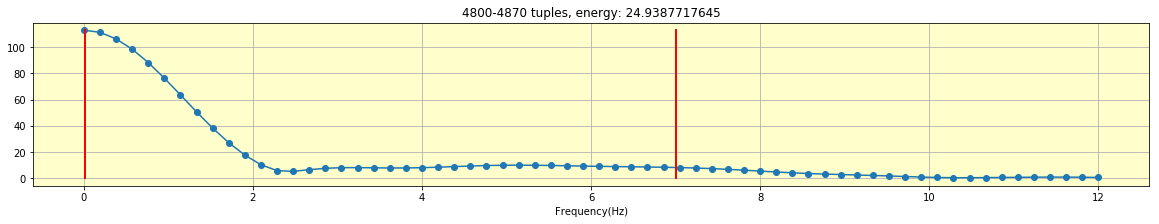

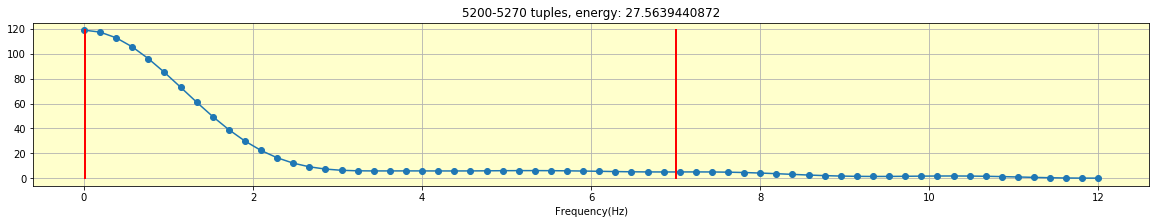

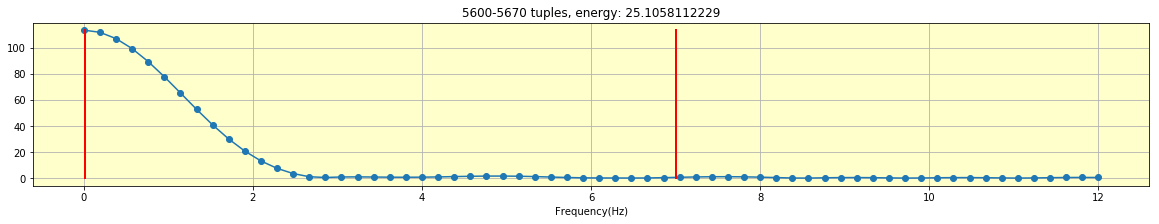

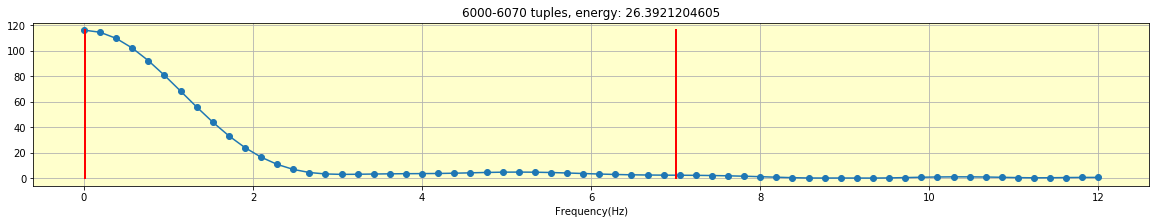

In [27]:
# n denotes the length of the DFT window, 400 tuples -> 4 second, 
# according to the ubicomp paper
fs = 100 # 100 HZ sampling
n = 70 
start = 0
low_fs = 0.01
high_fs = 7
l = 512
while(start + n <= len(accMagn)):
    w = hammingWindow(n)
    # zero padding to 1024
    # for FFT
    fft_input = [Complex(0.0, 0.0)] * l
    for i in range(n):
        val = accMagn[start+i] * w[i]
        fft_input[i] = Complex(val, 0)

    fft_res = fft(fft_input)
    fft_output = [0.0] * l
    for i in range(l):
        fft_output[i] = fft_res[i].abs()
        
    energy = 0.0
    for i in range(int(low_fs/fs*l), int(high_fs/fs*l)+1):
        energy += fft_output[i] * fft_output[i] / l
        
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(111, facecolor='#FFFFCC')
    y = np.asarray(fft_output[:l/8])
    x = np.linspace(0.0, fs/8, l/8)
    ax.plot(x, y, 'o-')
    text = str(start)+"-"+str((start+n))+" tuples, energy: "+str(energy)
    plt.title(text)
    plt.xlabel('Frequency(Hz)')
    # frequency from 0.6hz to 2.5hz
    plt.plot([0.01, 0.01], [0, max(y)], 'r-', lw=2)
    plt.plot([7, 7], [0, max(y)], 'r-', lw=2)
    plt.grid()
    plt.show()

    start = start + 400

In [ ]:
# n denotes the length of the DFT window, 400 tuples -> 4 second, 
# according to the ubicomp paper
fs = 100 # 100 HZ sampling
n = 70 
start = 0
sliding = 30
low_fs = 0.01
high_fs = 7
energy_thred = 20
walking = False
while(start + n <= len(accMagn)):
    l = 1024
    w = hammingWindow(n)
    # zero padding to 1024
    # for FFT
    fft_input = [Complex(0.0, 0.0)] * l
    for i in range(n):
        val = accMagn[start+i] * w[i]
        fft_input[i] = Complex(val, 0)

    fft_res = fft(fft_input)
    fft_output = [0.0] * l
    for i in range(l):
        fft_output[i] = fft_res[i].abs()
        
    energy = 0.0
    for i in range(int(low_fs/fs*l), int(high_fs/fs*l)+1):
        energy += fft_output[i] * fft_output[i] * 1.0 / l
        
    if energy > energy_thred:
        if walking == False:
            print start, "start walking"
            walking = True
    else:
        if walking == True:
            print start, "stop walking"
            walking = False
    
    start = start + sliding

**All together**

In [ ]:
file_name = "dataset/p4-1_Male_20-29_170-179cm_Hand_held.txt"

In [28]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
pi = math.pi

class Complex:
    def __init__(self, real, imag):
        self.re = real
        self.im = imag
        
    def __str__(self):
        if self.im == 0:
            return str(self.re)
        elif self.im < 0:
            return str(self.re)+' - '+str(-self.im)+' i'
        else:
            return str(self.re)+' + '+str(self.im)+' i'
    
    def __eq__(self, other):
        return self.re == other.re and self.im == other.im

    def __hash__(self):
        return hash((self.re, self.im))
    
    def abs(self):
        return math.hypot(self.re, self.im)
    
    def phase(self):
        return math.atan2(im, re)
        
    def plus(self, c):
        real = c.re + self.re
        imag = c.im + self.im
        return Complex(real, imag)
    
    def minus(self, c):
        real = self.re - c.re
        imag = self.im - c.im
        return Complex(real, imag)
    
    def times(self, c):
        real = self.re * c.re - self.im * c.im
        imag = self.re * c.im + self.im * c.re
        return Complex(real, imag)
    
    def scale(self, alpha):
        return Complex(self.re*alpha, self.im*alpha)
    
    def conjugate(self):
        return Complex(self.re, -self.im)
    
    def reciprocal(self):
        scale = self.re*self.re + self.im*self.im
        return Complex(self.re/scale, -self.im/scale)
    
    def real(self):
        return self.re
    
    def imag(self):
        return self.im
    
    def divides(self, c):
        return self.times(c.reciprocal())
    
    def exp(self):
        re = self.re
        im = self.im
        return Complex(math.exp(re) * math.cos(im), math.exp(re) * math.sin(im))
    
    def sin(self):
        re = self.re
        im = self.im
        return Complex(math.sin(re) * math.cosh(im), math.cos(re) * math.sinh(im))
    
    def cos(self):
        re = self.re
        im = self.im
        return Complex(math.cos(re) * math.cosh(im), -math.sin(re) * math.sinh(im))
    
    def tan(self):
        return self.sin().divides(self.cos())

def fft(x):        
    if x[0] is None:
        print "error"
        return None
    n = len(x)
    if n == 1:
        return [x[0]]
    if n % 2 != 0:
        print "n is not a power of 2"
        return None
    even = [None] * (n/2)
    for k in range(0, n/2):
        even[k] = x[2*k]
    q = fft(even)
    
    odd = even # reuse the array
    for k in range(0, n/2):
        odd[k] = x[2*k + 1]
    r = fft(odd)
    
    # combine even and odd
    y = [None] * n
    for k in range(0, n/2):
        kth = -2*k*pi/n
        wk = Complex(math.cos(kth), math.sin(kth))
        y[k]       = q[k].plus(wk.times(r[k]))
        y[k + n/2] = q[k].minus(wk.times(r[k]))
    return y

# compute the inverse FFT
def ifft(x):
    n = len(x)
    
    y = [None] * n
    # take conjugate
    for i in range(n):
        y[i] = x[i].conjugate()
    
    y = fft(y)
    
    # take conjugate again
    for i in range(n):
        y[i] = y[i].conjugate()
        
    for i in range(n):
        y[i] = y[i].scale(1.0 / n)
        
    return y

# compute the circular convolution of x and y
def cconvolve(x, y):
    if len(x) != len(y):
        print "error, x y length does not match"
        return None
    n = len(x)
    # compute FFT of each sequence
    a = fft(x)
    b = fft(y)
    
    # point-wise multiply
    c = [None] * n
    for i in range(n):
        c[i] = a[i].times(b[i])
    
    # compute inverse FFT
    return ifft(c)

# linear convolution of x and y
def convolve(x, y):
    zero = Complex(0, 0)
    a = [None] * (2*len(x))
    for i in range(len(x)):
        a[i] = x[i]
    for i in range(len(x), 2*len(x)):
        a[i] = zero
        
    b = [None] * (2*len(y))
    for i in range(len(y)):
        b[i] = y[i]
    for i in range(len(y), 2*len(y)):
        b[i] = zero
    
    return cconvolve(a, b)

def show(x):
    for item in x:
        print item

def hammingWindow(n):
    pi = math.pi
    w = [None] * n
    for i in range(n):
        w[i] = 0.54 - 0.46*math.cos(2*pi*i/(n-1))
    return w
file_names = ["dataset/p4-1_Male_20-29_170-179cm_Hand_held.txt"]
for file_name in file_names:
    raw_data = []
    accX = []
    accY = []
    accZ = []
    accMagn = []
    fr = open(file_name, 'r')
    for line in fr.readlines():
        items = line.split(';')
        x = items[1]
        y = items[2]
        z = items[3]
        magn = items[4].split()[0]
        data_tuple = [float(x), float(y), float(z), float(magn)]
        raw_data.append(data_tuple)
        accX.append(float(x))
        accY.append(float(y))
        accZ.append(float(z))
        accMagn.append(1/3.0*float(magn))
    fr.close()
    print file_name.split('/')[1] + " *read over", len(raw_data)

    # n denotes the length of the DFT window, 400 tuples -> 4 second, 
    # according to the ubicomp paper
    fs = 100 # 100 HZ sampling
    n = 400 
    start = 0
    sliding = 30
    low_fs = 0.6
    high_fs = 2.5
    energy_thred = 1.0
    walking = False
    while(start + n <= len(accMagn)):
        l = 1024
        w = hammingWindow(n)
        # zero padding to 1024
        # for FFT
        fft_input = [Complex(0.0, 0.0)] * l
        for i in range(n):
            val = accMagn[start+i] * w[i]
            fft_input[i] = Complex(val, 0)

        fft_res = fft(fft_input)
        fft_output = [0.0] * l
        for i in range(l):
            fft_output[i] = fft_res[i].abs()

        energy = 0.0
        for i in range(int(low_fs/fs*l), int(high_fs/fs*l)+1):
            energy += fft_output[i] * fft_output[i] * 1.0 / l

        if energy > energy_thred:
            if walking == False:
                print start, "start walking"
                walking = True
        else:
            if walking == True:
                print start, "stop walking"
                walking = False

        start = start + sliding

p4-1_Male_20-29_170-179cm_Hand_held.txt *read over 6326
660 start walking
5250 stop walking


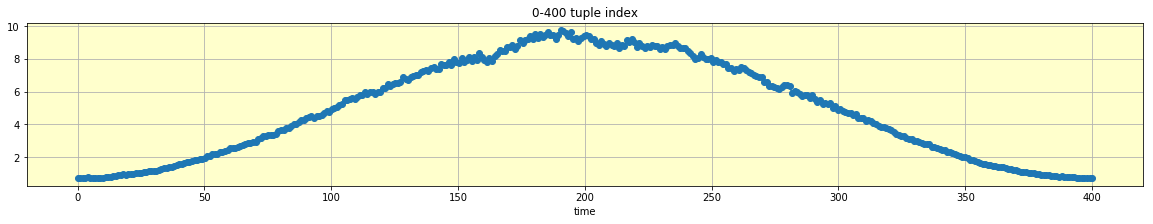

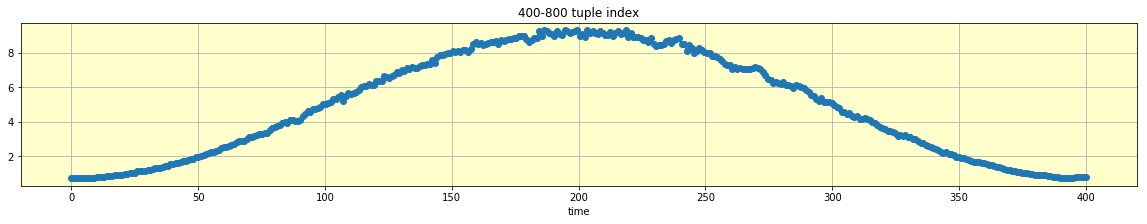

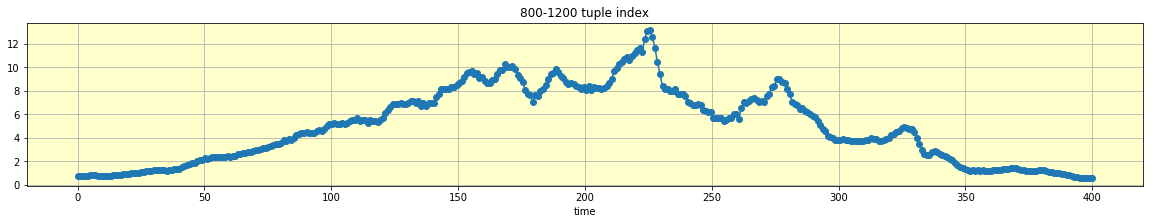

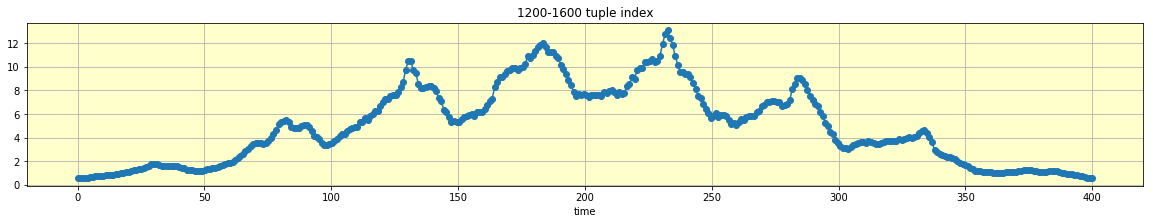

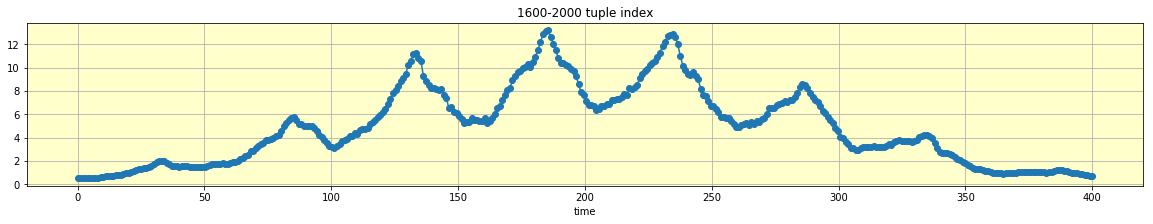

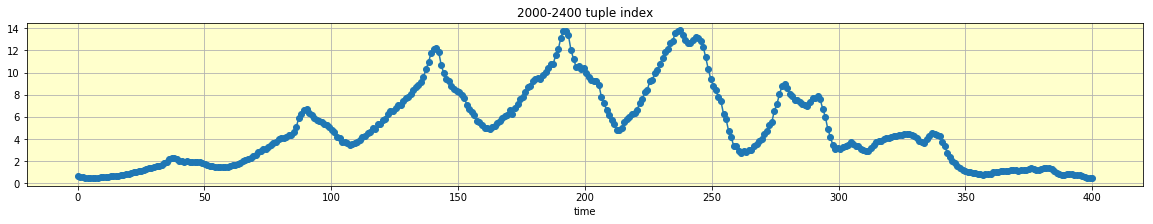

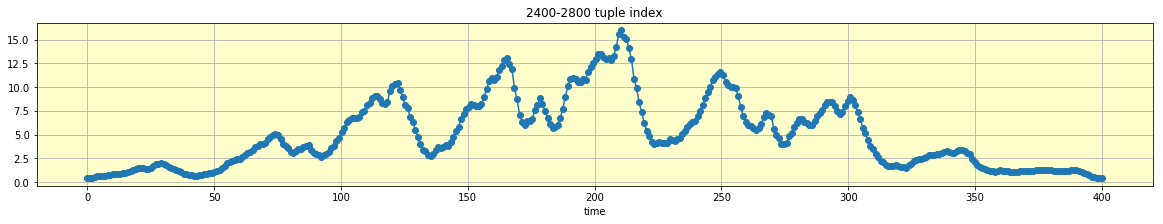

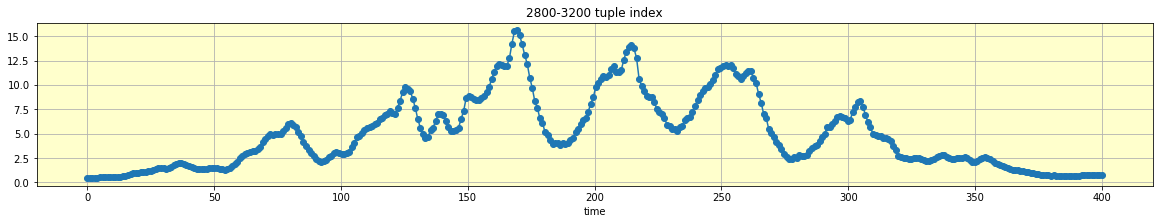

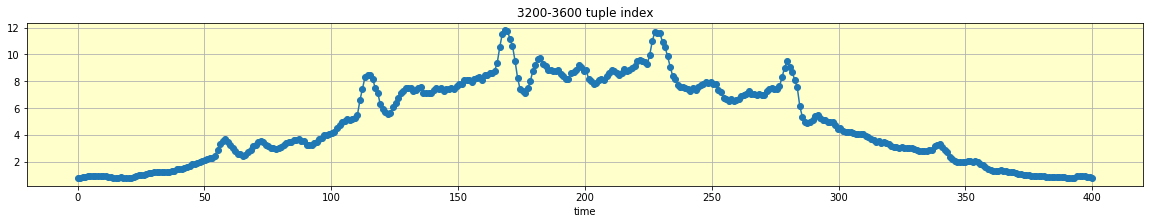

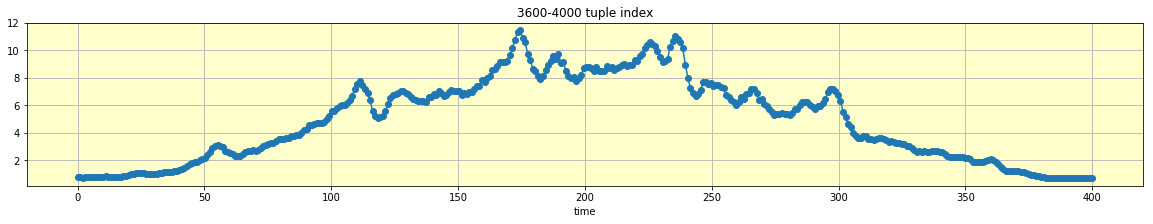

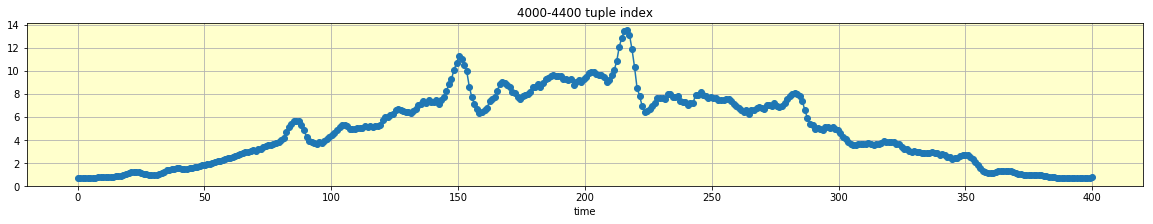

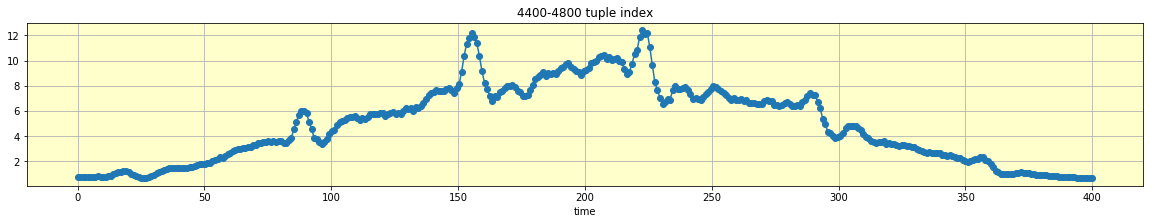

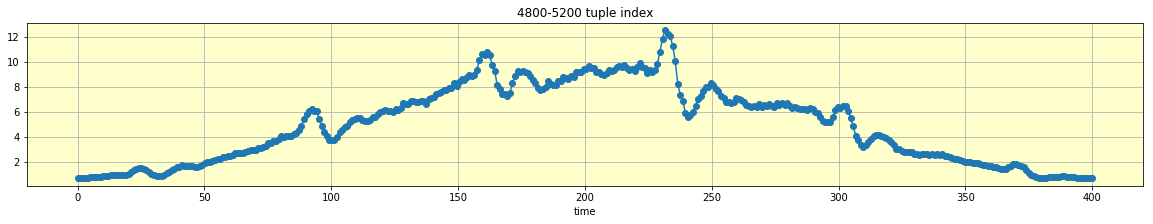

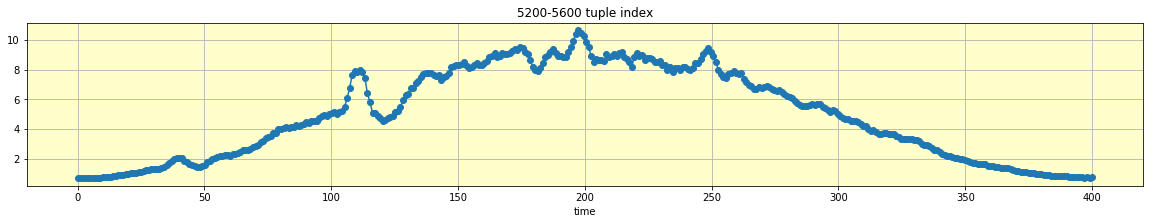

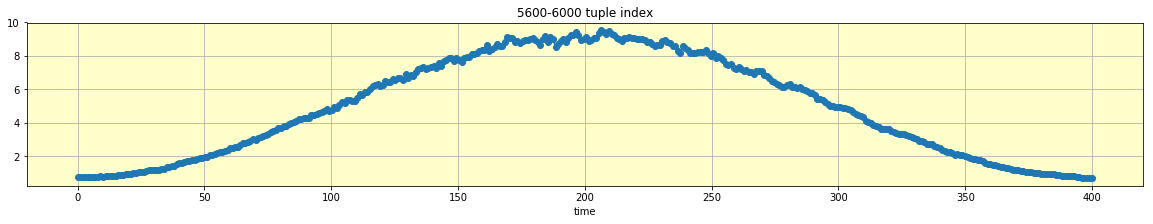

In [21]:
# n denotes the length of the DFT window, 400 tuples -> 4 second, 
# according to the ubicomp paper
fs = 100 # 100 HZ sampling
n = 400 
start = 0
while(start + n <= len(accMagn)):
    l = 1024
    w = hammingWindow(n)
    # zero padding to 1024
    # for FFT
    fft_input = [Complex(0.0, 0.0)] * l
    for i in range(n):
#         val = accMagn[start+i]
        val = accMagn[start+i] * w[i]
        fft_input[i] = Complex(val, 0)

    fft_res = fft(fft_input)
    
    # filter out the signal in [0.3, 2.5] HZ domain
    
#     low_index = 0.3/fs*l
#     high_index = 2.5/fs*l
#     for i in range(l):
#         if i < low_index or i > high_index:
#             fft_res[i] = Complex(0.0, 0.0)
            
    ifft_res = ifft(fft_res)
    fft_output = [0.0] * l
    for i in range(l):
        fft_output[i] = ifft_res[i].abs()

    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(111, facecolor='#FFFFCC')
    y = np.asarray(fft_output[:400])
    x = np.linspace(0, 400, 400)
    ax.plot(x, y, 'o-')
    text = str(start)+"-"+str((start+n))+" tuple index"
    plt.title(text)
    plt.xlabel('time')
    plt.grid()
#     plt.savefig('fig/'+text+'.png')
    plt.show()
#     break
    start = start + n

**Library provides by Python**

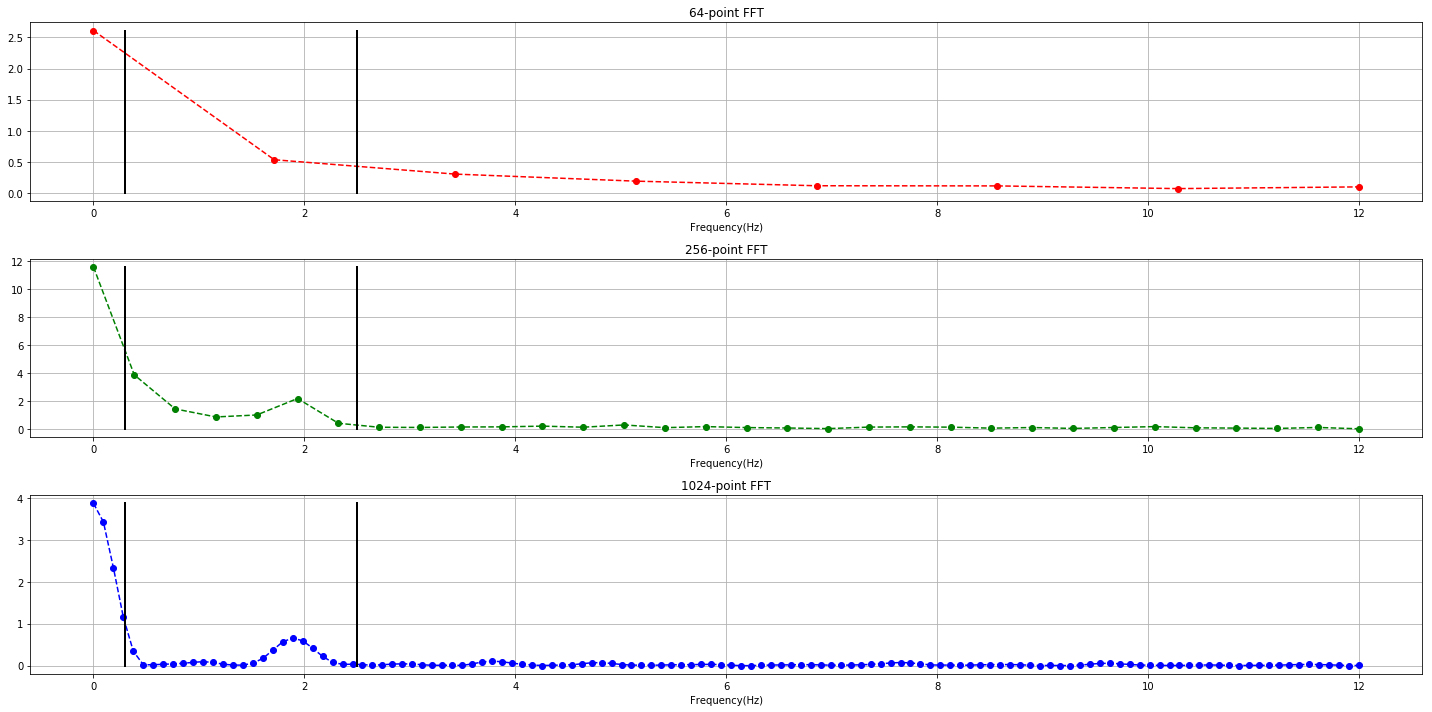

In [103]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import wave
import math
import scipy.fftpack
from scipy import signal
from scipy.io import wavfile

import warnings
warnings.filterwarnings('ignore')

raw = accMagn[1600:2000]
fft_input = np.asarray(raw)
fft_input = fft_input * signal.hamming(len(fft_input))

# should be in power of 2
n_fft_64 = 64               
n_fft_256 = 256
n_fft_1024 = 1024

fft_output_64 = scipy.fftpack.fft(fft_input,n_fft_64)
fft_output_256 = scipy.fftpack.fft(fft_input,n_fft_256)
fft_output_1024 = scipy.fftpack.fft(fft_input,n_fft_1024)

# single-sided spectrum (no imaginary or minus frequency)
fft_output_64 = 2.0/n_fft_64 * np.abs(fft_output_64[:n_fft_64/8])  
fft_output_256 = 2.0/n_fft_256 * np.abs(fft_output_256[:n_fft_256/8])
fft_output_1024 = 2.0/n_fft_1024 * np.abs(fft_output_1024[:n_fft_1024/8])

# devided into n_fft bins
freq_64 = np.linspace(0.0, fs/8, n_fft_64/8) 
freq_256 = np.linspace(0.0, fs/8, n_fft_256/8)
freq_1024 = np.linspace(0.0, fs/8, n_fft_1024/8)

# visualize
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title('64-point FFT')
plt.xlabel('Frequency(Hz)')
plt.plot(freq_64,fft_output_64,'r--',marker='o')
# frequency from 0.3hz to 2.5hz
plt.plot([0.3, 0.3], [0, max(fft_output_64)], 'k-', lw=2)
plt.plot([2.5, 2.5], [0, max(fft_output_64)], 'k-', lw=2)
plt.grid()

plt.subplot(3,1,2)
plt.title('256-point FFT')
plt.xlabel('Frequency(Hz)')
plt.plot(freq_256,fft_output_256,'g--',marker='o')
# frequency from 0.6hz to 2.5hz
plt.plot([0.3, 0.3], [0, max(fft_output_256)], 'k-', lw=2)
plt.plot([2.5, 2.5], [0, max(fft_output_256)], 'k-', lw=2)
plt.grid()

plt.subplot(3,1,3)
plt.title('1024-point FFT')
plt.xlabel('Frequency(Hz)')
plt.plot(freq_1024,fft_output_1024,'b--',marker='o')
# frequency from 0.6hz to 2.5hz
plt.plot([0.3, 0.3], [0, max(fft_output_1024)], 'k-', lw=2)
plt.plot([2.5, 2.5], [0, max(fft_output_1024)], 'k-', lw=2)
plt.grid()

plt.tight_layout()
plt.show()